# **Drug Consumption Pattern**
---

# Background

a healthcare non-governmental organization (NGO) is conducting a research, dedicated to studying drug consumption patterns across various Western countries. The study involves a randomly selected samples of 1,885 participants, all of whom are aged 18 years or older and come from diverse backgrounds. The research explores the participants' socio-economic factors (age, gender, education, ethnicity, and nationality). Additionally, the study investigates the use of 18 different substances, including alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine, and volatile substance abuse. To identify over-claimers, a fictitious drug called Semeron was introduced. 
Participants were asked to indicate their frequency of drug use, ranging from never using the drug to using it over a decade ago, or in the last decade, year, month, week, or day. 
Personality tests were also administered, including the NEO-FFI-R, which assesses neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness. Additionally, the BIS-11 measured impulsivity, while the ImpSS evaluated sensation-seeking tendencies.

# Problem Statement
The goal of this research is to **explore the diverse drug consumption patterns among individuals who engage in co-occurring drug use**. Addressing this problem may contribute to better understanding and developing of targeted interventions and strategies for healthcare professionals and policymakers.

As a data analyst, the objective is to investigate the following question:

**What are the most frequently co-occurring drugs consumed by the participants, and what are the corresponding characteristics of individuals who engage in such drug combinations?**




# Data

To answer the questions, now lets analyze all the data that has been provided below:

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

This dataset contains identity, personality measurements, and drug consumptions of the respondents that were being collected during the survey time. There are 32 columns in this dataset, which will be explained below:

| Attribute | Description |
| --- | --- |
| ID | Number of record in the original database |
| Age | Participant's age range |
| Gender | Male or Female |
| Education | Level of Education of participant |
| Country | Nationality of participant |
| Ethnicity | Ethnicity of participant |
| NScore | NEO-FFI-R Neuroticism score |
| EScore | NEO-FFI-R Extraversion score |
| OScore | NEO-FFI-R Openness to experience score |
| AScore | NEO-FFI-R Agreeableness score |
| CScore | NEO-FFI-R Conscientiousness score |
| Impulsive | Impulsiveness measured by BIS-11 |
| SS | Sensation seeking measured by ImpSS |
| Alcohol | Class of alcohol consumption |
| Amphet | Class of amphetamines consumption |
| Amyl | Class of amyl nitrite consumption |
| Benzos | Class of benzodiazepine consumption |
| Caff | Class of caffeine consumption |
| Cannabis | Class of cannabis consumption |
| Choc | Class of chocolate consumption |
| Coke | Class of cocaine consumption |
| Crack | Class of crack consumption |
| Ecstasy | Class of ecstasy consumption |
| Heroin | Class of heroin consumption |
| Ketamine | Class of ketamine consumption |
| Legalh | Class of legal highs consumption |
| LSD | Class of LSD consumption |
| Meth | Class of methadone consumption |
| Mushroom | Class of magic mushrooms consumption |
| Nicotine | Class of nicotine consumption |
| Semer | Class of fictitious drug Semeron consumption |
| VSA | Class of volatile substance abuse consumption |



Here you can see the top and bottom rows of our raw data:

In [305]:
df_i = pd.read_csv('drug_consumption.data')
display(df_i.head(), df_i.tail()) 

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1883,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


## Data Understanding and Cleaning

Since the provided data are extremely raw, before analyze, it would be better to translate our dataset. To undersand our data, we should familiarize ourselves with the dataset to know the anomalies and further clean the unecessary data with a logical reasoning. 

First, let us translate our initial data into a more proper and readable dataset.

In [306]:
# Rename the header of each columns

df = df_i.T.reset_index().T.copy()
df = df.reset_index(drop=True)
df = df.rename(columns= {0:'ID',1:'Age',2:'Gender',3:'Education', 4:'Country', 5:'Ethnicity', 6:'NScore', 7:'EScore', 8:'OScore', 9:'AScore', 10:'CScore', 11: "Impulsive", 12:'SS', 13:'Alcohol', 14:'Amphet', 15:'Amyl', 16:'Benzos', 17:'Caff', 18:'Cannabis', 19: 'Choc', 20:'Coke', 21:'Crack', 22:'Ecstasy', 23:'Heroin', 24:'Ketamine', 25:'Legalh', 26:'LSD', 27:'Meth', 28:'Mushroom', 29:'Nicotine', 30: 'Semer', 31: 'VSA'})
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [307]:
# Set Column 'ID' as the index
df = df.set_index('ID')

In [308]:
# Translate each values into the given information

# Age
def map_age_range(df, age):
    age_map = {-0.95197: '18-24',
               -0.07854: '25-34',
               0.49788: '35-44',
               1.09449: '45-54',
               1.82213: '55-64',
               2.59171: '65+'}
    df['Age'] = df[age].map(age_map)
    return df
df = map_age_range(df,'Age')
df.head()

# Gender
def map_gender(df, gender):
    gender_a = {0.48246: 'Female',
               -0.48246: 'Male',}
    df['Gender'] = df[gender].map(gender_a)
    return df
df = map_gender(df,'Gender')
df

#Education
def map_edu(df, edu):
    edu_a = {-2.43591: 'Left school before 16 years',
               -1.73790: 'Left school at 16 years',
               -1.43719: 'Left school at 17 years',
               -1.22751: 'Left school at 18 years',
               -0.61113: 'Some college or university, no certificate or degree',
               -0.05921: 'Professional certificate/diploma',
               0.45468: 'University Degree',
               1.16365: 'Masters Degree',
               1.98437: 'Doctorate Degree'}
    df['Education'] = df[edu].map(edu_a)
    return df
df = map_edu(df,'Education')
df

# Country
def map_country(df, count):
    count_a = {-0.09765:'Australia',
               0.24923: 'Canada',
               -0.46841: 'New Zealand',
               -0.28519:'Others',
               0.21128:'Republic of Ireland',
               0.96082: 'UK',
               -0.57009: 'USA'}
    df['Country'] = df[count].map(count_a)
    return df
df = map_country(df,'Country')
df

# Ethnicity
def map_ethnic(df, ethnic):
    ethnic_a = {-0.50212:'Asian',
                -1.10702:'Black',
                1.90725:'Mixed-Black/Asian',
                0.12600:'Mixed-White/Asian',
                -0.22166:'Mixed-White/Black',
                0.11440:'Others',
                -0.31685:'White'}
    df['Ethnicity'] = df[ethnic].map(ethnic_a)
    return df
df = map_ethnic(df,'Ethnicity')
df

#NScore
def map_nscore(df, nscore):
    nscore_a = {-3.46436: '12',
                -3.15735:'13',
                -2.75696:'14',
                -2.52197:'15',
                -2.42317:'16',
                -2.34360:'17',
                -2.21844:'18',
                -2.05048:'19',
                -1.86962:'20',
                -1.69163:'21',
                -1.55078:'22',
                -1.43907:'23',
                -1.32828:'24',
                -1.19430:'25',
                -1.05308:'26',
                -0.92104:'27',
                -0.79151:'28',
                -0.67825:'29',
                -0.58016:'30',
                -0.46725:'31',
                -0.34799:'32',
                -0.24649:'33',
                -0.14882:'34',
                -0.05188:'35',
                0.04257:'36',
                0.13606:'37',
                0.22393:'38',
                0.31287:'39',
                0.41667:'40',
                0.52135:'41',
                0.62967:'42',
                0.73545:'43',
                0.82562:'44',
                0.91093:'45',
                1.02119:'46',
                1.13281:'47',
                1.23461:'48',
                1.37297:'49',
                1.49158:'50',
                1.60383:'51',
                1.72012:'52',
                1.83990:'53',
                1.98437:'54',
                2.12700:'55',
                2.28554:'56',
                2.46262:'57',
                2.61139:'58',
                2.82196:'59',
                3.27393:'60'
                }
    df['NScore'] = df[nscore].map(nscore_a)
    return df
df = map_nscore(df,'NScore')
df

#EScore
def map_escore(df, escore):
    escore_a = {-3.27393: '16',
                -3.00537:'18',
                -2.72827:'19',
                -2.53830:'20',
                -2.44904:'21',
                -2.32338:'22',
                -2.21069:'23',
                -2.11437:'24',
                -2.03972:'25',
                -1.92173:'26',
                -1.76250:'27',
                -1.63340:'28',
                -1.50796:'29',
                -1.37639:'30',
                -1.23177:'31',
                -1.09207:'32',
                -0.94779:'33',
                -0.80615:'34',
                -0.69509:'35',
                -0.57545:'36',
                -0.43999:'37',
                -0.30033:'38',
                -0.15487:'39',
                0.00332:'40',
                0.16767:'41',
                0.32197:'42',
                0.47617:'43',
                0.63779:'44',
                0.80523:'45',
                0.96248:'46',
                1.11406:'47',
                1.28610:'48',
                1.45421:'49',
                1.58487:'50',
                1.74091:'51',
                1.93886:'52',
                2.12700:'53',
                2.32338:'54',
                2.57309:'55',
                2.85950:'56',
                3.00537:'58',
                3.27393:'59',

                }
    df['EScore'] = df[escore].map(escore_a)
    return df
df = map_escore(df,'EScore')
df

#OScore
def map_oscore(df, oscore):
    oscore_a = {-3.27393:'24',
                -2.85950:'26',
                -2.63199:'28',
                -2.39883:'29',
                -2.21069:'30',
                -2.09015:'31',
                -1.97495:'32',
                -1.82919:'33',
                -1.68062:'34',
                -1.55521:'35',
                -1.42424:'36',
                -1.27553:'37',
                -1.11902:'38',
                -0.97631:'39',
                -0.84732:'40',
                -0.71727:'41',
                -0.58331:'42',
                -0.45174:'43',
                -0.31776:'44',
                -0.17779:'45',
                -0.01928:'46',
                0.14143:'47',
                0.29338:'48',
                0.44585:'49',
                0.58331:'50',
                0.72330:'51',
                0.88309:'52',
                1.06238:'53',
                1.24033:'54',
                1.43533:'55',
                1.65653:'56',
                1.88511:'57',
                2.15324:'58',
                2.44904:'59',
                2.90161:'60',
                }
    df['OScore'] = df[oscore].map(oscore_a)
    return df
df = map_oscore(df,'OScore')
df

#AScore
def map_ascore(df, ascore):
    ascore_a = {-3.46436: '12',
                -3.15735:'16',
                -3.00537:'18',
                -2.90161:'23',
                -2.78793:'24',
                -2.70172:'25',
                -2.53830:'26',
                -2.35413:'27',
                -2.21844:'28',
                -2.07848:'29',
                -1.92595:'30',
                -1.77200:'31',
                -1.62090:'32',
                -1.47955:'33',
                -1.34289:'34',
                -1.21213:'35',
                -1.07533:'36',
                -0.91699:'37',
                -0.76096:'38',
                -0.60633:'39',
                -0.45321:'40',
                -0.30172:'41',
                -0.15487:'42',
                -0.01729:'43',
                0.13136:'44',
                0.28783:'45',
                0.43852:'46',
                0.59042:'47',
                0.76096:'48',
                0.94156:'49',
                1.11406:'50',
                1.2861:'51',
                1.45039:'52',
                1.61108:'53',
                1.81866:'54',
                2.03972:'55',
                2.23427:'56',
                2.46262:'57',
                2.75696:'58',
                3.15735:'59',
                3.46436:'60'
                }
    df['AScore'] = df[ascore].map(ascore_a)
    return df
df = map_ascore(df,'AScore')
df

#CScore
def map_cscore(df, cscore):
    cscore_a = {-3.46436: '17',
                -3.15735:'19',
                -2.90161:'20',
                -2.72827:'21',
                -2.57309:'22',
                -2.42317:'23',
                -2.30408:'24',
                -2.18109:'25',
                -2.04506:'26',
                -1.92173:'27',
                -1.78169:'28',
                -1.64101:'29',
                -1.51840:'30',
                -1.38502:'31',
                -1.25773:'32',
                -1.13788:'33',
                -1.01450:'34',
                -0.89891:'35',
                -0.78155:'36',
                -0.65253:'37',
                -0.52745:'38',
                -0.40581:'39',
                -0.27607:'40',
                -0.14277:'41',
                -0.00665:'42',
                0.12331:'43',
                0.25953:'44',
                0.41594:'45',
                0.58489:'46',
                0.7583:'47',
                0.93949:'48',
                1.13407:'49',
                1.30612:'50',
                1.46191:'51',
                1.63088:'52',
                1.81175:'53',
                2.04506:'54',
                2.33337:'55',
                2.63199:'56',
                3.00537:'57',
                3.46436:'59',
                }
    df['CScore'] = df[cscore].map(cscore_a)
    return df
df = map_cscore(df,'CScore')
df

#Drugs
def map_drugs(df, drugs):
    drugs_a = {'CL0':'Never Used',
               'CL1':'Used over a decade ago',
               'CL2':'Used in last decade',
               'CL3':'Used in last year',
               'CL4':'Used in last month',
               'CL5':'Used in last week',
               'CL6':'Used in last day',}
    df[drugs] = df[drugs].map(drugs_a)
    return df

df = map_drugs(df,'Alcohol')
df = map_drugs(df,'Amphet')
df = map_drugs(df,'Amyl')
df = map_drugs(df,'Benzos')
df = map_drugs(df,'Caff')
df = map_drugs(df,'Cannabis')
df = map_drugs(df,'Choc')
df = map_drugs(df,'Coke')
df = map_drugs(df,'Crack')
df = map_drugs(df,'Ecstasy')
df = map_drugs(df,'Heroin')
df = map_drugs(df,'Ketamine')
df = map_drugs(df,'Legalh')
df = map_drugs(df,'LSD')
df = map_drugs(df,'Meth')
df = map_drugs(df,'Mushroom')
df = map_drugs(df,'Nicotine')
df = map_drugs(df,'Semer')
df = map_drugs(df,'VSA')

df

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Used in last year,Never Used,Used in last month,Never Used,Never Used
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in last decade,Never Used,Never Used,Never Used,Never Used,Used in last decade,Never Used,Never Used
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,Used over a decade ago,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Used in last decade,Used in last decade,Never Used,Never Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or degree",USA,White,25,51,57,48,33,...,Never Used,Never Used,Never Used,Used in last year,Used in last year,Never Used,Never Used,Never Used,Never Used,Used in last week
1885,18-24,Male,"Some college or university, no certificate or degree",USA,White,33,51,50,48,30,...,Used in last decade,Never Used,Never Used,Used in last year,Used in last week,Used in last month,Used in last month,Used in last week,Never Used,Never Used
1886,25-34,Female,University Degree,USA,White,47,30,37,31,31,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Never Used,Used in last decade,Used in last day,Never Used,Never Used


In [309]:
# data has been translated!
display(df.head(),df.tail())

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Used in last year,Never Used,Used in last month,Never Used,Never Used
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in last decade,Never Used,Never Used,Never Used,Never Used,Used in last decade,Never Used,Never Used
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,Used over a decade ago,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Used in last decade,Used in last decade,Never Used,Never Used


,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1884,18-24,Female,"Some college or university, no certificate or degree",USA,White,25,51,57,48,33,...,Never Used,Never Used,Never Used,Used in last year,Used in last year,Never Used,Never Used,Never Used,Never Used,Used in last week
1885,18-24,Male,"Some college or university, no certificate or degree",USA,White,33,51,50,48,30,...,Used in last decade,Never Used,Never Used,Used in last year,Used in last week,Used in last month,Used in last month,Used in last week,Never Used,Never Used
1886,25-34,Female,University Degree,USA,White,47,30,37,31,31,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Never Used,Used in last decade,Used in last day,Never Used,Never Used
1887,18-24,Female,"Some college or university, no certificate or degree",USA,White,45,26,48,32,22,...,Used in last year,Never Used,Never Used,Used in last year,Used in last year,Never Used,Used in last year,Used in last month,Never Used,Never Used
1888,18-24,Male,"Some college or university, no certificate or degree",Republic of Ireland,White,31,53,56,50,45,...,Used in last year,Never Used,Never Used,Used in last year,Used in last year,Never Used,Used in last year,Used in last day,Never Used,Used in last decade


In [310]:
print(f'The total rows and columns in this dataset are {df.shape}')
df.info()

The total rows and columns in this dataset are (1885, 31)
<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        1884 non-null   object
 1   Gender     1884 non-null   object
 2   Education  1884 non-null   object
 3   Country    1884 non-null   object
 4   Ethnicity  1884 non-null   object
 5   NScore     1884 non-null   object
 6   EScore     1884 non-null   object
 7   OScore     1884 non-null   object
 8   AScore     1884 non-null   object
 9   CScore     1884 non-null   object
 10  Impulsive  1885 non-null   object
 11  SS         1885 non-null   object
 12  Alcohol    1885 non-null   object
 13  Amphet     1885 non-null   object
 14  Amyl       1885 non-null   object
 15  Benzos     1884 non-null   object
 16  Caff       1885 non-null   object
 17  Cannabis   1884 non-null   object
 18  Choc       1884 non-null   object
 19  Coke       1884 

In [311]:
display(df.describe(), df.describe(include='object'))

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,...,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,6,2,9,7,7,49,42,35,41,41,...,7,7,7,7,7,7,7,7,5,7
top,18-24,Male,"Some college or university, no certificate or degree",UK,White,31,40,46,44,46,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in last day,Never Used,Never Used
freq,643,943,506,1043,1720,87,130,134,118,113,...,1020,1604,1489,1093,1068,1428,981,610,1876,1454


,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,...,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,6,2,9,7,7,49,42,35,41,41,...,7,7,7,7,7,7,7,7,5,7
top,18-24,Male,"Some college or university, no certificate or degree",UK,White,31,40,46,44,46,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in last day,Never Used,Never Used
freq,643,943,506,1043,1720,87,130,134,118,113,...,1020,1604,1489,1093,1068,1428,981,610,1876,1454


In [312]:
# Duplicated data
df.duplicated().sum()

0

In [313]:
# Number of missing value in each columns
df.isna().sum()

Age          1
Gender       1
Education    1
Country      1
Ethnicity    1
NScore       1
EScore       1
OScore       1
AScore       1
CScore       1
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       1
Caff         0
Cannabis     1
Choc         1
Coke         1
Crack        1
Ecstasy      1
Heroin       1
Ketamine     1
Legalh       1
LSD          1
Meth         1
Mushroom     1
Nicotine     1
Semer        1
VSA          1
dtype: int64

In [314]:
# Unique data in each columns

pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Age,6,"[nan, 25-34, 35-44, 18-24, 65+, 45-54, 55-64]"
1,Gender,2,"[nan, Male, Female]"
2,Education,9,"[nan, Doctorate Degree, Professional certificate/diploma, Masters Degree, Left school at 18 years, Left school at 16 years, University Degree, Some college or university, no certificate or degree, Left school before 16 years, Left school at 17 years]"
3,Country,7,"[nan, UK, Canada, USA, Others, Australia, Republic of Ireland, New Zealand]"
4,Ethnicity,7,"[nan, White, Others, Mixed-White/Black, Asian, Mixed-White/Asian, Black, Mixed-Black/Asian]"
5,NScore,49,"[nan, 29, 31, 34, 43, 24, 42, 33, 26, 56, 28, 27, 19, 22, 41, 49, 32, 25, 40, 51, 35, 36, 39, 46, 44, 37, 47, 23, 30, 38, 18, 45, 17, 53, 50, 60, 21, 54, 59, 48, 20, 55, 16, 57, 52, 58, 14, 15, 13, 12]"
6,EScore,42,"[nan, 52, 45, 34, 28, 38, 32, 55, 40, 41, 49, 29, 31, 39, 27, 43, 33, 16, 44, 37, 51, 36, 42, 48, 46, 47, 35, 50, 30, 26, 58, 53, 54, 23, 22, 24, 19, 20, 21, 25, 56, 59, 18]"
7,OScore,35,"[nan, 55, 40, 46, 43, 35, 39, 36, 38, 47, 49, 34, 44, 45, 29, 51, 37, 54, 24, 41, 52, 48, 28, 53, 32, 42, 33, 26, 31, 50, 58, 30, 56, 57, 60, 59]"
8,AScore,41,"[nan, 48, 32, 47, 41, 55, 38, 30, 49, 39, 36, 45, 40, 53, 50, 43, 33, 46, 51, 23, 44, 29, 54, 42, 37, 35, 34, 52, 31, 57, 56, 27, 25, 28, 58, 26, 59, 24, 18, 12, 16, 60]"
9,CScore,41,"[nan, 41, 34, 46, 50, 52, 48, 49, 43, 53, 38, 36, 59, 47, 31, 30, 33, 35, 51, 42, 25, 37, 45, 39, 44, 27, 40, 29, 54, 55, 32, 56, 20, 28, 26, 22, 24, 23, 19, 17, 21, 57]"


In [315]:
df['Education'].value_counts()


Some college or university, no certificate or degree    506
University Degree                                       480
Masters Degree                                          283
Professional certificate/diploma                        269
Left school at 18 years                                 100
Left school at 16 years                                 99 
Doctorate Degree                                        89 
Left school at 17 years                                 30 
Left school before 16 years                             28 
Name: Education, dtype: int64

In [316]:
df['Country'].value_counts()


UK                     1043
USA                    557 
Others                 118 
Canada                 87  
Australia              54  
Republic of Ireland    20  
New Zealand            5   
Name: Country, dtype: int64

In [317]:
df['Ethnicity'].value_counts()

White                1720
Others               63  
Black                33  
Asian                26  
Mixed-White/Black    20  
Mixed-White/Asian    19  
Mixed-Black/Asian    3   
Name: Ethnicity, dtype: int64

Overall, we know that:
- This dataset contains 32 columns and 1885 rows.
- There is one missing value in our data. 
- 'Chocolate' is not consider as a drug, so we can delete this column. (Soruce = [link](https://gardenstatetreatmentcenter.com/chocolate-drug/#:~:text=Chocolate%20is%20not%20a%20controlled,can%20act%20like%20a%20drug.))

- As mentioned before, 'Semer' is a fictitious drug. To prevent confusion, we will remove this column.
- 'Caffeine' is considered a widely consumed substance that can be found in various products, including coffee, tea, and energy drinks. Children under 16 years old may also consume caffeine, up until elderly. I personally think the consumption of caffeine will significantly differ from the other drugs and would make a potential bias and challenges during our analysis. It would be best for us to drop 'Caffeine' to create more balanced and comparable groups.
- All drugs columns are categorical. It would be easier for us to change the data into ordinal data for analytical purposes.
- Since there are no enough information for 'Impulsive' and 'SS' for us to translate, it would be easier for us to delete these columns.
- There is a significant difference in the representations of Education and Ethnicity. It would be better if we merge some categories into one (if it is not too important)
- There is a disparity in the participants' Country. It would be better if we merge each country into Continents.


# Missing Values

In [318]:
missing_index = df.index[df.isnull().any(axis=1)]
missing_index

# Missing value is located in index number 0

Index(['1'], dtype='object', name='ID')

In [319]:
df.head()

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Used in last year,Never Used,Used in last month,Never Used,Never Used
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in last decade,Never Used,Never Used,Never Used,Never Used,Used in last decade,Never Used,Never Used
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,Used over a decade ago,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Used in last decade,Used in last decade,Never Used,Never Used


In [320]:
# from the information, we know that the only missing values are all located in the first data. 
# Since we know the value from the raw data, we can change it manually

df['Age'][0] = '35-44'
df['Gender'][0] = 'Female'
df['Education'][0] = 'Professional certificate/diploma'
df['Country'][0] = 'UK'
df['Ethnicity'][0] = 'Mixed-White/Asian'
df['NScore'][0] = '39'
df['EScore'][0] = '36'
df['OScore'][0] = '42'
df['AScore'][0] = '37'
df['CScore'][0] = '42'
df['Benzos'][0] = 'Used in last decade'
df['Cannabis'][0] = 'Never Used'
df['Choc'][0] = 'Used in last week'
df['Coke'][0] = 'Never Used'
df['Crack'][0] = 'Never Used'
df['Ecstasy'][0] = 'Never Used'
df['Heroin'][0] = 'Never Used'
df['Ketamine'][0] = 'Never Used'
df['Legalh'][0] = 'Never Used'
df['LSD'][0] = 'Never Used'
df['Meth'][0] = 'Never Used'
df['Mushroom'][0] = 'Never Used'
df['Nicotine'][0] = 'Used in last decade'
df['Semer'][0] = 'Never Used'
df['VSA'][0] = 'Never Used'

df.head()

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in last decade,Never Used,Never Used
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,Used in last month,Never Used,Used in last decade,Never Used,Used in last decade,Used in last year,Never Used,Used in last month,Never Used,Never Used
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in last decade,Never Used,Never Used,Never Used,Never Used,Used in last decade,Never Used,Never Used
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,Used over a decade ago,Never Used,Never Used,Used over a decade ago,Never Used,Never Used,Used in last decade,Used in last decade,Never Used,Never Used


In [321]:
# We can drop all the unnecessary columns which we mentioned before

df_clean = df.drop(columns =['Choc', 'Semer', 'Caff','Impulsive','SS']).copy()

In [322]:
# Replacing all the consumption period into ordinal numbers in all drug columns

df_clean.loc[:,'Alcohol':] = df_clean.loc[:,'Alcohol':].replace({
    'Never Used':0, 
    'Used over a decade ago':1, 
    'Used in last decade':2, 
    'Used in last year':3,
    'Used in last month':4,
    'Used in last week':5,
    'Used in last day':6})
df_clean

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,...,0,0,0,0,0,0,0,0,2,0
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,0,4,0,2,0,2,3,0,4,0
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,0,0,0,2,0,0,0,0,2,0
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or degree",USA,White,25,51,57,48,33,...,0,0,0,0,3,3,0,0,0,5
1885,18-24,Male,"Some college or university, no certificate or degree",USA,White,33,51,50,48,30,...,0,2,0,0,3,5,4,4,5,0
1886,25-34,Female,University Degree,USA,White,47,30,37,31,31,...,0,4,0,2,0,2,0,2,6,0


In [323]:
for column in df_clean.columns[5:]:
    df_clean[column] = df_clean[column].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        1885 non-null   object
 1   Gender     1885 non-null   object
 2   Education  1885 non-null   object
 3   Country    1885 non-null   object
 4   Ethnicity  1885 non-null   object
 5   NScore     1885 non-null   int64 
 6   EScore     1885 non-null   int64 
 7   OScore     1885 non-null   int64 
 8   AScore     1885 non-null   int64 
 9   CScore     1885 non-null   int64 
 10  Alcohol    1885 non-null   int64 
 11  Amphet     1885 non-null   int64 
 12  Amyl       1885 non-null   int64 
 13  Benzos     1885 non-null   int64 
 14  Cannabis   1885 non-null   int64 
 15  Coke       1885 non-null   int64 
 16  Crack      1885 non-null   int64 
 17  Ecstasy    1885 non-null   int64 
 18  Heroin     1885 non-null   int64 
 19  Ketamine   1885 non-null   int64 
 20  Legalh     1885 non-null   int64 
 

In [324]:
# Make new column that consist of the total frequency of overall drugs consumption
df_clean['Total_Consumption'] = df_clean.groupby('ID')['Alcohol', 'Amphet', 'Amyl','Benzos', 'Cannabis','Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushroom','Nicotine','VSA'].sum().sum(axis=1)
df_clean.head()

,Age,Gender,Education,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA,Total_Consumption
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,...,0,0,0,0,0,0,0,2,0,11
2,25-34,Male,Doctorate Degree,UK,White,29,52,55,48,41,...,4,0,2,0,2,3,0,4,0,31
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,0,0,0,0,0,0,1,0,0,10
4,18-24,Female,Masters Degree,UK,White,34,34,46,47,46,...,0,0,2,0,0,0,0,2,0,15
5,35-44,Female,Doctorate Degree,UK,White,43,28,43,41,50,...,1,0,0,1,0,0,2,2,0,15


## Merging Some 'Education' Categories

In [325]:
# There is a significant disparity in the educational levels of participants
# The idea is to combine 'Left school before 16 years' 'Left school at 16 years' 'Left school at 17 years' and 'Left school at 18 years'
# Check whether there are significant differences between each of those categories
df_clean['Education'].value_counts()

Some college or university, no certificate or degree    506
University Degree                                       480
Masters Degree                                          283
Professional certificate/diploma                        270
Left school at 18 years                                 100
Left school at 16 years                                 99 
Doctorate Degree                                        89 
Left school at 17 years                                 30 
Left school before 16 years                             28 
Name: Education, dtype: int64

In [326]:
cat = ["Left school before 16 years", "Left school at 16 years", "Left school at 17 years", "Left school at 18 years"]
edu_cat = df_clean[df_clean['Education'].isin(cat)]

# Means of each Categories
edu_cat.groupby('Education').mean()

# ANOVA Test
# H0 = There is no significant difference in the means of 'Total_Consumption' among the 4 education categories.
# H1 = There is a significant difference in the means of 'Total_Consumption' among the 4 education categories.
from scipy.stats import f_oneway
stats, pvalue = f_oneway(
    edu_cat.loc[edu_cat['Education'] == "Left school before 16 years"]['Total_Consumption'],
    edu_cat.loc[edu_cat['Education'] == "Left school at 16 years"]['Total_Consumption'],
    edu_cat.loc[edu_cat['Education'] == "Left school at 17 years"]['Total_Consumption'],
    edu_cat.loc[edu_cat['Education'] == "Left school at 18 years"]['Total_Consumption']
)
pvalue

4.789542054539483e-05

In [327]:
# Reject H0. There is a significant difference  in the means of 'Total_Consumption' between each categories
# To know which categories differ from each others, Post Hoc test will be conducted (Tukey's Honestly Significant Difference (HSD) test)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(edu_cat['Total_Consumption'].values, edu_cat['Education'].values)
print(tukey)


                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                    group2           meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------
Left school at 16 years     Left school at 17 years   8.4556 0.0297   0.5867 16.3244   True
Left school at 16 years     Left school at 18 years   9.7156    0.0   4.3625 15.0687   True
Left school at 16 years Left school before 16 years   5.9841 0.2243  -2.0976 14.0658  False
Left school at 17 years     Left school at 18 years     1.26 0.9759  -6.5997  9.1197  False
Left school at 17 years Left school before 16 years  -2.4714 0.9175 -12.3928  7.4499  False
Left school at 18 years Left school before 16 years  -3.7314 0.6303 -11.8042  4.3413  False
-------------------------------------------------------------------------------------------


- Individuals who left school at 16 years and those who left school at 18 years have a significantly different total consumption. 
- There are no significant differences among the remaining categories.
- So I decided to combine 'Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years' into 1 category

In [328]:
df_clean['Education'] = df_clean['Education'].replace(["Left school before 16 years", "Left school at 16 years"], "Left school <=16 years")
df_clean['Education'] = df_clean['Education'].replace(["Left school at 17 years", "Left school at 18 years"], "Left school at 17 & 18 years")

df_clean['Education'].value_counts()

Some college or university, no certificate or degree    506
University Degree                                       480
Masters Degree                                          283
Professional certificate/diploma                        270
Left school at 17 & 18 years                            130
Left school <=16 years                                  127
Doctorate Degree                                        89 
Name: Education, dtype: int64

## Merging Some 'Ethnicity' Categories

In [329]:
# The proportions of White participants and Mixed participants differ significantly
# The idea is to combine some categories to reduce the disparity
# Check whether there are significant differences between each categories
df_clean['Ethnicity'].value_counts()


White                1720
Others               63  
Black                33  
Asian                26  
Mixed-White/Asian    20  
Mixed-White/Black    20  
Mixed-Black/Asian    3   
Name: Ethnicity, dtype: int64

In [330]:
cat = ["Mixed-White/Asian", "Mixed-White/Black", "Mixed-Black/Asian"]
eth_cat = df_clean[df_clean['Ethnicity'].isin(cat)]

# Means of each Categories
eth_cat.groupby('Ethnicity').mean()

# ANOVA Test

# H0 = There is no significant difference in the means of 'Total_Consumption' among the 3 ethnicity categories.
# H1 = There is a significant difference in the means of 'Total_Consumption' among the 3 ethnicity categories.
stats, pvalue = f_oneway(
    eth_cat.loc[eth_cat['Ethnicity'] == "Mixed-White/Asian"]['Total_Consumption'],
    eth_cat.loc[eth_cat['Ethnicity'] == "Mixed-White/Black"]['Total_Consumption'],
    eth_cat.loc[eth_cat['Ethnicity'] == "Mixed-Black/Asian"]['Total_Consumption'],
)
pvalue

0.824632181571218

In [331]:
# H0 accepted = There is no significant difference in the means of 'Total_Consumption' between each categories
# Merging all 'Mixed' Ethnicities into 1 category
df_clean['Ethnicity'] = df_clean['Ethnicity'].replace(["Mixed-White/Asian", "Mixed-White/Black", "Mixed-Black/Asian"], 'Mixed')
df_clean['Ethnicity'].value_counts()

White     1720
Others    63  
Mixed     43  
Black     33  
Asian     26  
Name: Ethnicity, dtype: int64

## Switch 'Country' into 'Continent' Column

In [332]:
df_clean['Country'].value_counts()


UK                     1044
USA                    557 
Others                 118 
Canada                 87  
Australia              54  
Republic of Ireland    20  
New Zealand            5   
Name: Country, dtype: int64

In [333]:
df_clean['Country'] = df_clean['Country'].replace({
    'UK': 'Europe',
    'Republic of Ireland': 'Europe',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'USA': 'America',
    'Canada': 'America'
})
df_clean.rename(columns={'Country': 'Continent'}, inplace=True)
df_clean['Continent'].value_counts()


Europe     1064
America    644 
Others     118 
Oceania    59  
Name: Continent, dtype: int64

In [334]:
df_clean.head()

,Age,Gender,Education,Continent,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA,Total_Consumption
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,Europe,Mixed,39,36,42,37,42,...,0,0,0,0,0,0,0,2,0,11
2,25-34,Male,Doctorate Degree,Europe,White,29,52,55,48,41,...,4,0,2,0,2,3,0,4,0,31
3,35-44,Male,Professional certificate/diploma,Europe,White,31,45,40,32,34,...,0,0,0,0,0,0,1,0,0,10
4,18-24,Female,Masters Degree,Europe,White,34,34,46,47,46,...,0,0,2,0,0,0,0,2,0,15
5,35-44,Female,Doctorate Degree,Europe,White,43,28,43,41,50,...,1,0,0,1,0,0,2,2,0,15


In [335]:
# Now that Total_Consumption are no longer needed, Drop those columns
df_clean = df_clean.drop(columns =['Total_Consumption']).copy()


# Cleaned Data

We've cleaned the data, now lets see our dataset's updated information

In [336]:
df_clean.head()

,Age,Gender,Education,Continent,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,Europe,Mixed,39,36,42,37,42,...,0,0,0,0,0,0,0,0,2,0
2,25-34,Male,Doctorate Degree,Europe,White,29,52,55,48,41,...,0,4,0,2,0,2,3,0,4,0
3,35-44,Male,Professional certificate/diploma,Europe,White,31,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
4,18-24,Female,Masters Degree,Europe,White,34,34,46,47,46,...,0,0,0,2,0,0,0,0,2,0
5,35-44,Female,Doctorate Degree,Europe,White,43,28,43,41,50,...,0,1,0,0,1,0,0,2,2,0


In [337]:
listItem = []
for col in df_clean.columns :
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(),
                    df_clean[col].nunique(), list(df_clean[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_clean.shape)
dfDesc

(1885, 26)


,dataFeatures,dataType,null,unique,uniqueSample
0,Age,object,0,6,"[18-24, 45-54]"
1,Gender,object,0,2,"[Female, Male]"
2,Education,object,0,7,"[University Degree, Doctorate Degree]"
3,Continent,object,0,4,"[Others, Oceania]"
4,Ethnicity,object,0,5,"[Others, Asian]"
5,NScore,int64,0,49,"[49, 51]"
6,EScore,int64,0,42,"[50, 27]"
7,OScore,int64,0,35,"[54, 38]"
8,AScore,int64,0,41,"[59, 55]"
9,CScore,int64,0,41,"[48, 33]"


Beforehand, we had 1885 rows and 32 columns in our data. 6 columns has been removed.

# Data Analysis

After performing data cleaning, our next step is to conduct an analysis to **identify the top co-occurring drugs and examine the associated characteristics of individuals who consume these drug combinations**. 

This analysis entails examining the relationships between different drugs to identify the top co-occurring drug combinations with the strongest correlations. 
Then, new columns will be created to indicate whether participants consume both co-occurring drugs (denoted as 1), or if they do not (denoted as 0). 
Afterward, the focus will be on exploring the associations between co-occurring drug consumers (target=1) and demographic variables, as well as behavioral variables. This comprehensive exploration aims to provide valuable insights into the patterns and profiles of drug users within the research study.

### 1. Correlation

In [338]:
# To see the co-occuring drug use, start by see the correlation between each drugs using Spearman method.

drugs_corr = df_clean.iloc[:,10:].corr(method='spearman')
drugs_corr

,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA
Alcohol,1.000000,-0.019874,0.075594,-0.029224,0.002330,0.053844,-0.057205,0.038368,-0.054706,0.047467,0.007961,-0.018231,-0.080322,-0.002445,0.043876,-0.003645
Amphet,-0.019874,1.000000,0.364245,0.505061,0.502548,0.605431,0.338850,0.579192,0.382546,0.404472,0.481968,0.496598,0.421956,0.481950,0.393667,0.331140
Amyl,0.075594,0.364245,1.000000,0.217389,0.215248,0.393278,0.180671,0.355915,0.171750,0.341484,0.213318,0.206202,0.080643,0.235316,0.226595,0.188280
Benzos,-0.029224,0.505061,0.217389,1.000000,0.370676,0.467510,0.371153,0.373751,0.435455,0.317265,0.346590,0.370143,0.514272,0.374776,0.318038,0.315883
Cannabis,0.002330,0.502548,0.215248,0.370676,1.000000,0.476375,0.241320,0.565297,0.239651,0.321649,0.577157,0.543240,0.321803,0.593579,0.515582,0.291365
Coke,0.053844,0.605431,0.393278,0.467510,0.476375,1.000000,0.407330,0.629823,0.429324,0.465759,0.421363,0.462780,0.375504,0.468099,0.414394,0.324091
Crack,-0.057205,0.338850,0.180671,0.371153,0.241320,0.407330,1.000000,0.260246,0.543465,0.271255,0.198971,0.307022,0.391481,0.293532,0.256377,0.308242
Ecstasy,0.038368,0.579192,0.355915,0.373751,0.565297,0.629823,0.260246,1.000000,0.289653,0.524569,0.569860,0.581545,0.312112,0.565209,0.392670,0.284837
Heroin,-0.054706,0.382546,0.171750,0.435455,0.239651,0.429324,0.543465,0.289653,1.000000,0.298591,0.243886,0.343392,0.500383,0.298882,0.246349,0.314402
Ketamine,0.047467,0.404472,0.341484,0.317265,0.321649,0.465759,0.271255,0.524569,0.298591,1.000000,0.406547,0.415405,0.236919,0.411012,0.257145,0.214453


<Axes: >

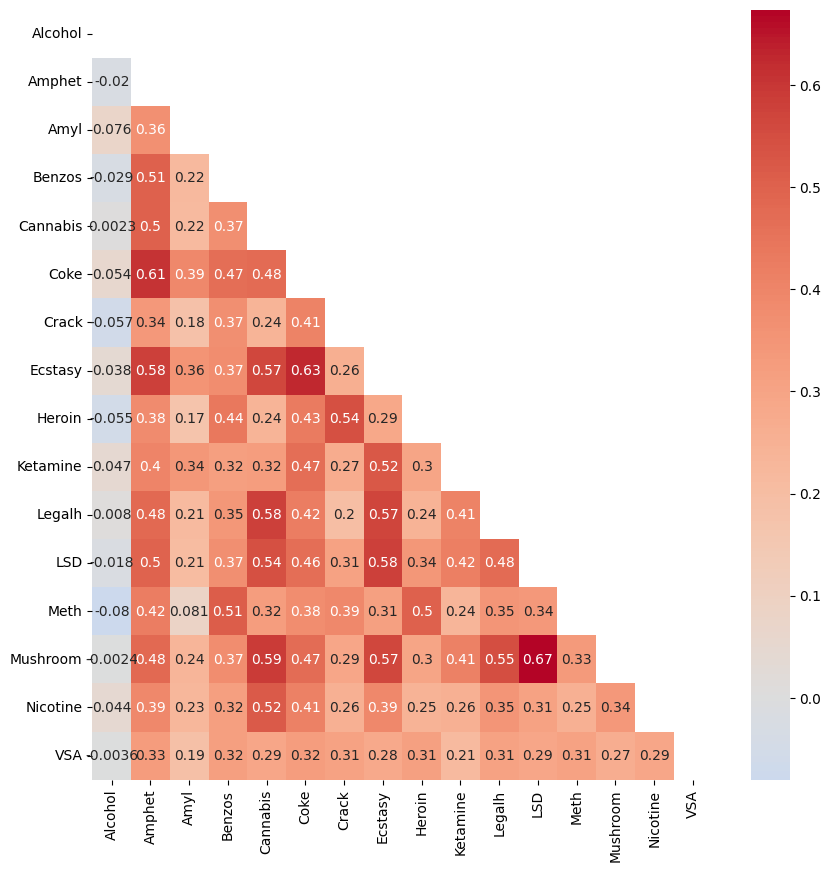

In [339]:
matrix = np.triu(df_clean.iloc[:,10:].corr(method='spearman'))

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    data=df_clean.iloc[:,10:].corr(method='spearman'),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix
)

From this figure, we can conclude that the top three co-occuring drugs used in this data are = 
1. LSD and Mushroom
2. Ecstasy and Coke
3. Mushroom and Cannabis 

Moving forward, our focus will be on exploring the characteristics of participants who consume the the top co-occurring drug combinations identified in the analysis: **LSD and Mushroom**.

In [340]:
df_clean.head()
df_final = df_clean.drop (columns= ['Alcohol','Amphet','Amyl','Benzos','Cannabis','Crack','Heroin','Ketamine','Legalh','Meth','Nicotine','VSA','Coke','Ecstasy']).copy()
df_final

# To make it easier, other columns except LSD and Mushroom will be dropped.

,Age,Gender,Education,Continent,Ethnicity,NScore,EScore,OScore,AScore,CScore,LSD,Mushroom
ID,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,Europe,Mixed,39,36,42,37,42,0,0
2,25-34,Male,Doctorate Degree,Europe,White,29,52,55,48,41,2,0
3,35-44,Male,Professional certificate/diploma,Europe,White,31,45,40,32,34,0,1
4,18-24,Female,Masters Degree,Europe,White,34,34,46,47,46,0,0
5,35-44,Female,Doctorate Degree,Europe,White,43,28,43,41,50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or degree",America,White,25,51,57,48,33,3,0
1885,18-24,Male,"Some college or university, no certificate or degree",America,White,33,51,50,48,30,5,4
1886,25-34,Female,University Degree,America,White,47,30,37,31,31,2,2


In [341]:
df_final['LSD_Mushroom'] = np.where((df_final['LSD'] > 2) & (df_final['Mushroom'] > 2), 1, 0)
df_final = df_final.drop(columns=['LSD','Mushroom'])
df_final

# New columns will be created to distringuish participants who consume both LSD and Mushroom. Participants who consume these co-occuring drugs will be labeled as 1, while those who do not will be labeled as 0.


,Age,Gender,Education,Continent,Ethnicity,NScore,EScore,OScore,AScore,CScore,LSD_Mushroom
ID,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,Europe,Mixed,39,36,42,37,42,0
2,25-34,Male,Doctorate Degree,Europe,White,29,52,55,48,41,0
3,35-44,Male,Professional certificate/diploma,Europe,White,31,45,40,32,34,0
4,18-24,Female,Masters Degree,Europe,White,34,34,46,47,46,0
5,35-44,Female,Doctorate Degree,Europe,White,43,28,43,41,50,0
...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or degree",America,White,25,51,57,48,33,0
1885,18-24,Male,"Some college or university, no certificate or degree",America,White,33,51,50,48,30,1
1886,25-34,Female,University Degree,America,White,47,30,37,31,31,0


The new column indicates participants that has LSD_Mushroom = 1 are LSD_Mushroom consumers, and 0 are non consumers.

We can start analyzing the characteristics of participants consumed LSD-Mushroom

### 2. Based on Demographic Variables = 

In this section, the main objective is to see the relationship of LSD_Mushroom consumption with its demographic variables of the consumers (Age,Gender, Education, Country, and Ethnicity)
Through the analysis of LSD-Mushroom consumption, we aim to address the following question: "Which demographic variables are associated with the consumption of LSD-Mushroom?"

Subsequently, based on the analysis, we can provide answers to the following questions:

- Which age group exhibits the highest prevalence of LSD and mushroom consumers?
- What gender demonstrates a higher prevalence of LSD and mushroom consumption?
- Which educational background is most commonly associated with LSD and mushroom consumption among participants?
- Which nationality has the most LSD-Mushroom consumers?
- What ethnicity has the most LSD-Mushroom consumers?

In [342]:
# function for chi square test
def chi2_contingency_results(variable):
    contingency_table = pd.crosstab(df_final[variable], df_final['LSD_Mushroom'])
    chi2, pvalue, dof, expected = chi2_contingency(contingency_table)

    print(f"\nVariable: {variable}")
    print("P-value:", pvalue)
    if pvalue > 0.05:
        print(f"pvalue > 0.05. Fail to reject H0.")
    else:
        
        print(f"pvalue <= 0.05. Reject Ho.")

# Function for visualization purposes (Bar Plot)
def plot_bar(variable):
    ct = pd.crosstab(df_final[variable], df_final['LSD_Mushroom'], normalize='index')
    ct['total'] = ct.sum(axis=1)
    
    plt.figure(figsize=(10, 4))
    x = np.arange(df_final[variable].nunique())
    plt.bar(x, ct['total'], label='Total')
    plt.bar(x, ct[1], label='LSD_Mushroom')
    plt.xlabel(f'{variable}')
    plt.ylabel(f'Proportion of LSD_Mushroom Consumption per category')
    plt.legend([0, 1])
    plt.xticks(x, ct.index.tolist(), rotation=45, ha='right', va='top')
    plt.title(variable)
    plt.show()

# Function for visualization purposes (Sunburst)
def visualize_sunburst(variable):
    fig = px.sunburst(df_final, path=[variable, 'LSD_Mushroom'], color='LSD_Mushroom',
                      title=f'LSD_Mushroom Consumer Proportions Based on {variable}')
    fig.show()

## 2a. LSD_Mushroom Consumption Relationship with Age

Testing the relation between LSD_Mushroom consumption and Age
**Hypothesis**
- H0 = There is no association between LSD_Mushroom consumption and Age
- H1 = There is an association between LSD_Mushroom consumption and Age


In [343]:
chi2_contingency_results('Age')

# Reject H0, means There is an association between LSD_Mushroom consumption and Age.


Variable: Age
P-value: 5.921079959352144e-54
pvalue <= 0.05. Reject Ho.


In [344]:
ct_age=pd.crosstab(df_final['Age'],df_final['LSD_Mushroom'])
ct_age['Total']=ct_age.sum(axis=1)
ct_age = ct_age.sort_values('Total',ascending=False)
ct_age

LSD_Mushroom,0,1,Total
Age,,,
18-24,432,211,643
25-34,421,60,481
35-44,345,11,356
45-54,289,5,294
55-64,93,0,93
65+,18,0,18


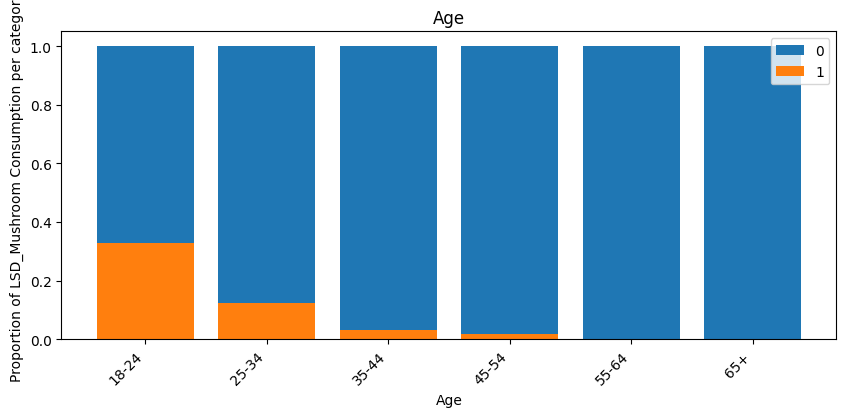

None

None

In [345]:
display (plot_bar('Age'), visualize_sunburst('Age'), )

Based on the statistical test, tables, and graphs above, we can conclude that there is an association between LSD_Mushroom consumption and Age. Also, age group 18-24 has the highest participants than the other age groups

From the cross tabulation and graphs, we know that the age group of 18-24 years old demonstrates the highest prevalence of LSD and Mushroom consumption. We can also see that the prevalence decreases steadily with the increasing of age group, with the lowest prevalence among individuals aged 65+ is 0%.

This suggests that younger individuals (approximately those who are on their late teens) are more likely to have a higher prevalence of LSD_Mushroom consumption compared to older age groups. This conclusion is consistent with the findings from United Nations Office on Drugs and Crime where 'data shows the peak levels of drug use are seen among those aged 18-25'  (Source = [link](https://www.unodc.org/wdr2018/prelaunch/WDR18_Booklet_4_YOUTH.pdf)).

The publication suggests that young individuals turn to drug use as a means of dealing with the social and psychological difficulties they encounter during the transitional periods of their lives, evolving from adolescence to early adulthood. This stage of development is characterized by heightened susceptibility to various influences as adolescents explore and adopt different behaviors.

## 2b. LSD_Mushroom Consumption Relationship with Gender

Testing the relation between LSD_Mushroom consumption and Gender
**Hypothesis**
- H0 = There is no association between LSD_Mushroom consumption and Gender
- H1 = There is an association between LSD_Mushroom consumption and Gender


In [346]:
chi2_contingency_results('Gender')

# Reject H0, means There is an association between LSD_Mushroom consumption and Gender.


Variable: Gender
P-value: 2.844689632652093e-17
pvalue <= 0.05. Reject Ho.


In [347]:
ct_Gender=pd.crosstab(df_final['Gender'],df_final['LSD_Mushroom'])
ct_Gender['Total']=ct_Gender.sum(axis=1)
ct_Gender = ct_Gender.sort_values('Total',ascending=False)
ct_Gender

LSD_Mushroom,0,1,Total
Gender,,,
Male,733,210,943
Female,865,77,942


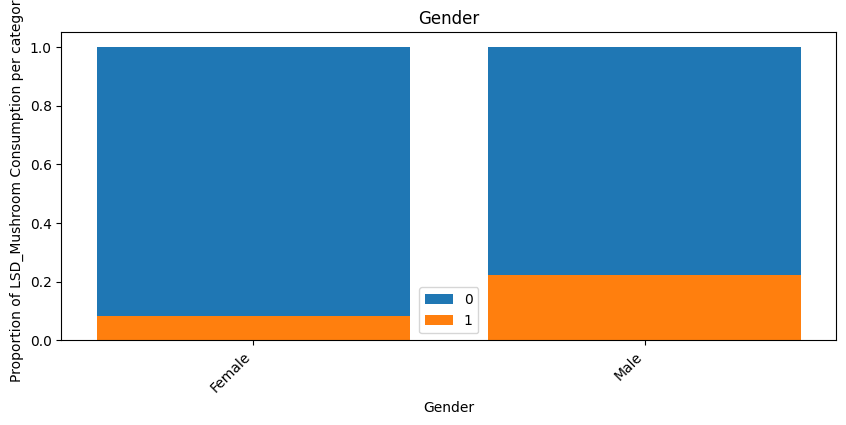

None

None

In [348]:
display ( plot_bar('Gender'), visualize_sunburst('Gender'))


The statistic test, graph, and table shows that there is a relation between LSD_Mushroom consumption and Gender.

Female and male participants in this research is relatively similar, but the proportion of male LSD_Mushroom user is higher than female user, indicates that consumption is more common among males. This conclusion aligns with the National Institute on Drug Abuse  findings which state 'Men are more likely than women to use almost all types of illicit drugs, and illicit drug use is more likely to result in emergency department visits or overdose deaths for men than for women' (Source= [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3540205/)).


## 2c. LSD_Mushroom Consumption Relationship with Education

Testing the relation between LSD_Mushroom consumption and Education
**Hypothesis**
- H0 = There is no association between LSD_Mushroom consumption and Education
- H1 = There is an association between LSD_Mushroom consumption and Education


In [349]:
chi2_contingency_results('Education')

# Reject H0, means There is an association between LSD_Mushroom consumption and Education.


Variable: Education
P-value: 5.733014943836724e-29
pvalue <= 0.05. Reject Ho.


In [350]:
ct_Education=pd.crosstab(df_final['Education'],df_final['LSD_Mushroom'])
ct_Education['Total']=ct_Education.sum(axis=1)
ct_Education = ct_Education.sort_values('Total',ascending=False)
ct_Education

LSD_Mushroom,0,1,Total
Education,,,
"Some college or university, no certificate or degree",354,152,506
University Degree,427,53,480
Masters Degree,262,21,283
Professional certificate/diploma,249,21,270
Left school at 17 & 18 years,99,31,130
Left school <=16 years,120,7,127
Doctorate Degree,87,2,89


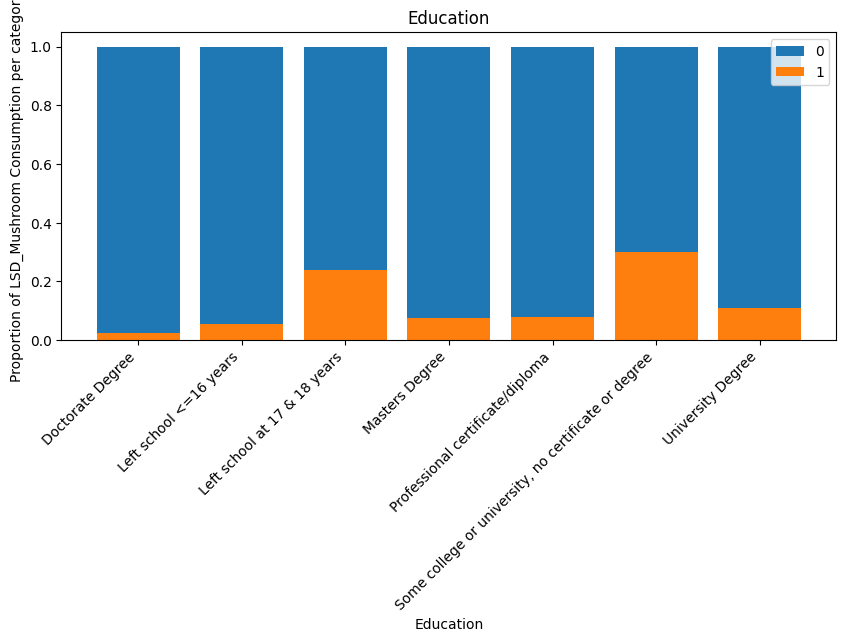

None

None

In [351]:
display ( plot_bar('Education'),visualize_sunburst('Education'))


Based on the provided data on LSD_Mushroom consumption by education level, education turns out to be related to the consumption of both drugs. The visualizations show the highest proportion of LSD_Mushroom consumption is found among individuals with a college / university degree without certification. 
Participants who has a university degree show a relatively high proportion of consumption, next to individuals with college/university degree without certification. 
This may be influenced to the increased exposure to environments where drug use is common, and influences by peer dynamics. Individuals with higher education tend to have a greater knowledge about the risks associated with drugs consumption.

## 2d. LSD_Mushroom Consumption Relationship with Continent

Testing the relation between LSD_Mushroom consumption and Continent
**Hypothesis**
- H0 = There is no association between LSD_Mushroom consumption and Continent
- H1 = There is an association between LSD_Mushroom consumption and Continent


In [352]:
chi2_contingency_results('Continent')

# Reject H0, means There is an association between LSD_Mushroom consumption and Continent.


Variable: Continent
P-value: 1.1794054048406756e-58
pvalue <= 0.05. Reject Ho.


In [353]:
ct_Continent=pd.crosstab(df_final['Continent'],df_final['LSD_Mushroom'])
ct_Continent['Total']=ct_Continent.sum(axis=1)
ct_Continent = ct_Continent.sort_values('Total',ascending=False)
ct_Continent

LSD_Mushroom,0,1,Total
Continent,,,
Europe,1029,35,1064
America,445,199,644
Others,86,32,118
Oceania,38,21,59


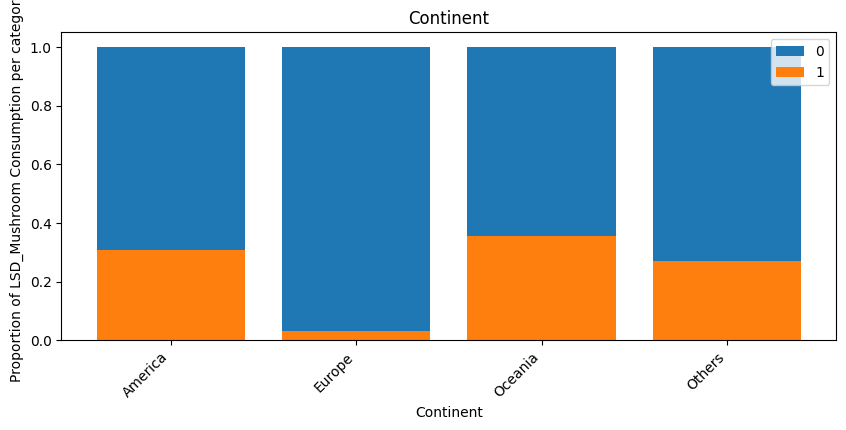

None

None

In [354]:
display ( plot_bar('Continent'),visualize_sunburst('Continent'))


Based on the statistical analysis conducted, it can be concluded that Continents which where the participants resides are also associated with LSD_Mushroom Consumption. Interestingly, despite having the highest number of participants, proportion of LSD_Mushroom consumption in Europeis relatively low (more than 1/4) compared to America. On the other hand, America, with a smaller total number of participants (6/10 of Europe) exhibits a higher proportion of those drugs. This findings also align with the findings from United Nations Office on Drugs and Crime, where Europe has the lowest drugs consumption among all continents. Also, a news from University of Michigan stated that American teens have higher rates of illicit drug use compared to European (Source = [link](https://news.umich.edu/compared-with-europe-american-teens-have-high-rates-of-illicit-drug-use/)). These may be influenced by some possible factors includes the difference of the availability and accessibility, and cultural differences.

## 2e. LSD_Mushroom Consumption Relationship with Ethnicity

Testing the relation between LSD_Mushroom consumption and Ethnicity
**Hypothesis**
- H0 = There is no association between LSD_Mushroom consumption and Ethnicity
- H1 = There is an association between LSD_Mushroom consumption and Ethnicity


In [355]:
chi2_contingency_results('Ethnicity')

# Reject H0, means There is an association between LSD_Mushroom consumption and Ethnicity.


Variable: Ethnicity
P-value: 0.00027181436971845035
pvalue <= 0.05. Reject Ho.


In [356]:
ct_Ethnicity=pd.crosstab(df_final['Ethnicity'],df_final['LSD_Mushroom'])
ct_Ethnicity['Total']=ct_Ethnicity.sum(axis=1)
ct_Ethnicity = ct_Ethnicity.sort_values('Total',ascending=False)
ct_Ethnicity

LSD_Mushroom,0,1,Total
Ethnicity,,,
White,1465,255,1720
Others,45,18,63
Mixed,31,12,43
Black,33,0,33
Asian,24,2,26


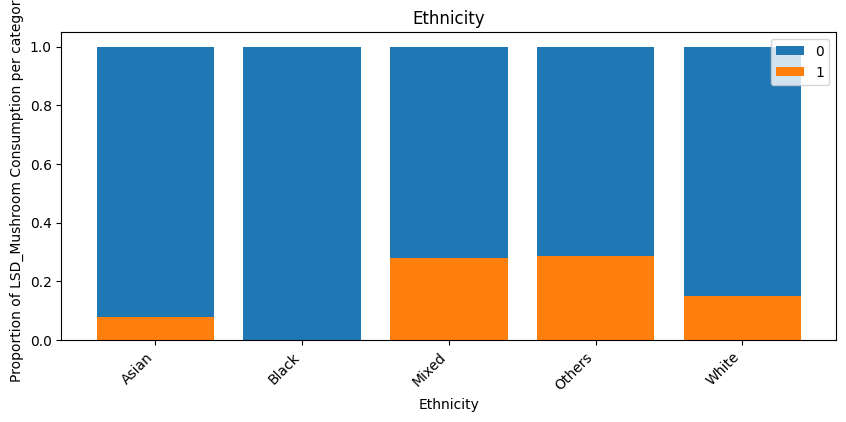

None

None

In [357]:
display ( plot_bar('Ethnicity'),visualize_sunburst('Ethnicity'))


From the data above, individuals identified as White  appears to be more prevalent to consume LSD_Mushroom compared to other ethnic groups. However, the sample sizes for some ethnicities are relatively small compared to White individuals. This disparity may impact the reliability and interpretability of the findings, we should be careful in making conclusions due to the small sample size. 

## 3. Based on The Big Five personality traits = 

Next, to analyze the relationship between FFM personality dimensions and LSD-Mushroom consumption, we will focus on the following columns: 'NScore', 'EScore', 'OScore', 'AScore', and 'CScore'. These columns correspond to the Big Five personality traits or the Five-Factor Model (FFM) personality dimensions.

By examining these columns, we aim to answer the following questions:

- What FFM personality dimensions are related to LSD and Mushroom consumption?
- Is there a difference in FFM personality dimensions between LSD and Mushroom consumers and non-consumers?       
- What are the characteristics of the FFM personality dimensions for LSD and Mushroom consumers?

In [358]:
# To check the distribution of each tests of the FFM Personality Dimension

variables = ['NScore', 'EScore', 'OScore', 'AScore', 'CScore']

for i in variables:
    stats, pval = normaltest(df_final[i])
    if pval <= 0.05:
        print(f'{i}: Non-Normal Distribution')  # Ha
    else:
        print(f'{i}: Normal Distribution')  # Ho

NScore: Non-Normal Distribution
EScore: Non-Normal Distribution
OScore: Non-Normal Distribution
AScore: Non-Normal Distribution
CScore: Non-Normal Distribution


Based on the distribution of the score variables, all scores are not distributed normally, therefore, I will now continue with Mann-Whitney test to analyze these variables.

### 3a. NSCORE

In [359]:
# Mann Whitney Test
# H0 = There is a significant difference in the distribution of NScore between LSD and Mushroom consumers compared to non-consumers
# H1 = There is no significant difference in the distribution of NScore between LSD and Mushroom consumers compared to non-consumers

group1 = df_final[df_final['LSD_Mushroom'] == 1]['NScore']
group0 = df_final[df_final['LSD_Mushroom'] == 0]['NScore']
stats, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

if p_value< 0.05:
    print("NScore:")
    print(f"P-value: {p_value}")
    print("Reject H0.\n")
else:
    print("NScore:")
    print(f"P-value: {p_value}")
    print("Accept H0.\n")


NScore:
P-value: 0.9027813680557057
Accept H0.



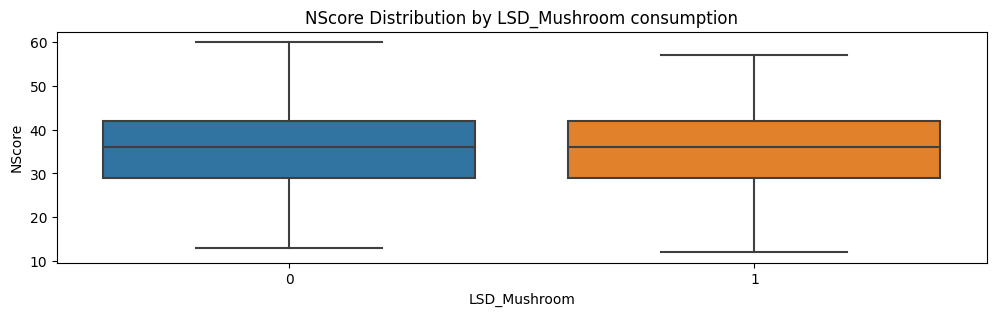

In [360]:
plt.figure(figsize=(12, 3))

sns.boxplot(x='LSD_Mushroom', y='NScore', data=df_final)
plt.title('NScore Distribution by LSD_Mushroom consumption')
plt.show()

In [361]:
users = df_final[df_final['LSD_Mushroom'] == 1]['NScore']
non_users = df_final[df_final['LSD_Mushroom'] == 0]['NScore']

median_users = np.median(users)
median_non_users = np.median(non_users)

if median_users > median_non_users:
    print("Drug users have a higher median NScore.")
elif median_users < median_non_users:
    print("Non-drug users have a higher median NScore.")
else:
    print("The medians are equal for drug users and non-drug users.")


The medians are equal for drug users and non-drug users.


Based on the statistical tests gathered for NScore, it suggests that there is no significant difference in the distribution of NScore between LSD_Mushroom consumers and non-consumers. The test additionally indicates the medians of NSCore for both groups are equal, which means there is no difference in the central tendency of NScore.

We can conclude that there is no enough evidence to state that LSD and Mushrooms consumption has an impact on NScore. 

### 3b. ESCORE

In [362]:
# Mann Whitney Test
# H0 = There is a significant difference in the distribution of EScore between LSD and Mushroom consumers compared to non-consumers
# H1 = There is no significant difference in the distribution of EScore between LSD and Mushroom consumers compared to non-consumers

group1 = df_final[df_final['LSD_Mushroom'] == 1]['EScore']
group0 = df_final[df_final['LSD_Mushroom'] == 0]['EScore']
stats, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

if p_value< 0.05:
    print("EScore:")
    print(f"P-value: {p_value}")
    print("Reject H0.\n")
else:
    print("EScore:")
    print(f"P-value: {p_value}")
    print("Accept H0.\n")


EScore:
P-value: 0.025932993829047624
Reject H0.



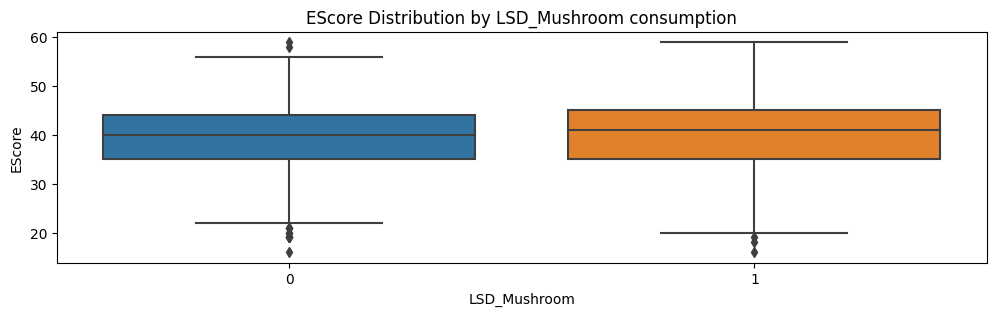

In [363]:
plt.figure(figsize=(12, 3))

sns.boxplot(x='LSD_Mushroom', y='EScore', data=df_final)
plt.title('EScore Distribution by LSD_Mushroom consumption')
plt.show()

In [364]:
users = df_final[df_final['LSD_Mushroom'] == 1]['EScore']
non_users = df_final[df_final['LSD_Mushroom'] == 0]['EScore']

median_users = np.median(users)
median_non_users = np.median(non_users)

if median_users > median_non_users:
    print("Drug users have a higher median EScore.")
elif median_users < median_non_users:
    print("Non-drug users have a higher median EScore.")
else:
    print("The medians are equal for drug users and non-drug users.")


Drug users have a higher median EScore.


Based on the analysis above, the p-value result from the Mann-Whitney test indicates that there is a significant difference in the distribution of EScore between drug users and non-users. It also indicates that the consumption of LSD_Mushroom may be associated with a higher levels of EScore than those who do not consume those substances. 

LSD and Mushroom are both belong to the category of hallucinogenic substances (Psychadelic). Higher EScore indicates the individual's preference for social interactions, and their level of comfort with external stimuli or outside world. (Source = [link](https://www.raijmr.com/ijrhs/wp-content/uploads/2017/11/IJRHS_2014_vol02_issue_02_05.pdf)).

Both hallucinogenic substances, have been linked to altered states of consciousness and perception. These substances can enhance sensory experiences, resulting in an increased comfort level with external stimuli and potentially leading to higher extraversion levels. 

### 3c. OSCORE

In [365]:
# Mann Whitney Test
# H0 = There is a significant difference in the distribution of OScore between LSD and Mushroom consumers compared to non-consumers
# H1 = There is no significant difference in the distribution of OScore between LSD and Mushroom consumers compared to non-consumers

group1 = df_final[df_final['LSD_Mushroom'] == 1]['OScore']
group0 = df_final[df_final['LSD_Mushroom'] == 0]['OScore']
stats, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

if p_value< 0.05:
    print("OScore:")
    print(f"P-value: {p_value}")
    print("Reject H0.\n")
else:
    print("OScore:")
    print(f"P-value: {p_value}")
    print("Accept H0.\n")


OScore:
P-value: 3.9267480460468074e-32
Reject H0.



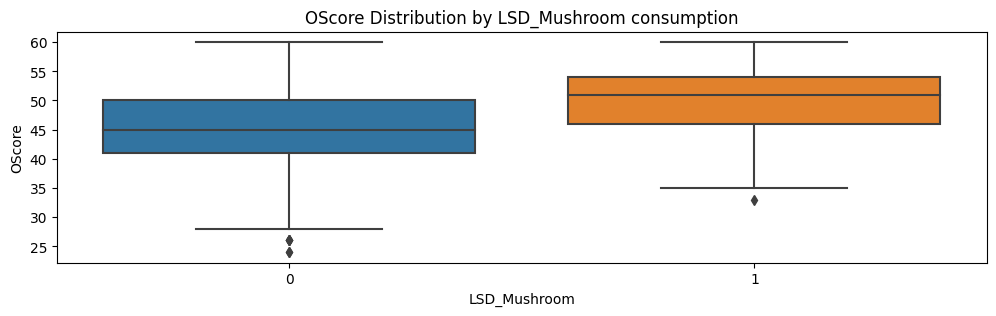

In [366]:
plt.figure(figsize=(12, 3))

sns.boxplot(x='LSD_Mushroom', y='OScore', data=df_final)
plt.title('OScore Distribution by LSD_Mushroom consumption')
plt.show()

In [367]:
users = df_final[df_final['LSD_Mushroom'] == 1]['OScore']
non_users = df_final[df_final['LSD_Mushroom'] == 0]['OScore']

median_users = np.median(users)
median_non_users = np.median(non_users)

if median_users > median_non_users:
    print("Drug users have a higher median OScore.")
elif median_users < median_non_users:
    print("Non-drug users have a higher median OScore.")
else:
    print("The medians are equal for drug users and non-drug users.")


Drug users have a higher median OScore.


Based on the conducted analysis, it can be concluded that there is a significant difference in the distribution of OScore between LSD_Mushrooms consumers and non-consumers, which drug users have a higher median OScore compared to non-drug users. 

OScore refers to Openness to Experience which associated with imagination, curiosity, and a willingness to explore experiences. LSD_Mushroom consumers has a higher median OScore suggests that those who consume these 2 drugs may exhibit greater opnness to new experiences. 

Hallucinogenic substances known to induce altered states of consciousness and hallucinations. These experiences can lead to cognitive changes, heightened imagination, and an increased willingness to explore new experiences, all of which are aligned with the personality trait of Openness to Experience. Therefore, individuals who consume LSD and Mushroom may exhibit a greater inclination towards novelty, imagination, and curiosity, as reflected in their higher OScore.

### 3d. ASCORE

In [368]:
# Mann Whitney Test
# H0 = There is a significant difference in the distribution of AScore between LSD and Mushroom consumers compared to non-consumers
# H1 = There is no significant difference in the distribution of AScore between LSD and Mushroom consumers compared to non-consumers

group1 = df_final[df_final['LSD_Mushroom'] == 1]['AScore']
group0 = df_final[df_final['LSD_Mushroom'] == 0]['AScore']
stats, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

if p_value< 0.05:
    print("AScore:")
    print(f"P-value: {p_value}")
    print("Reject H0.\n")
else:
    print("AScore:")
    print(f"P-value: {p_value}")
    print("Accept H0.\n")


AScore:
P-value: 0.0263358454561411
Reject H0.



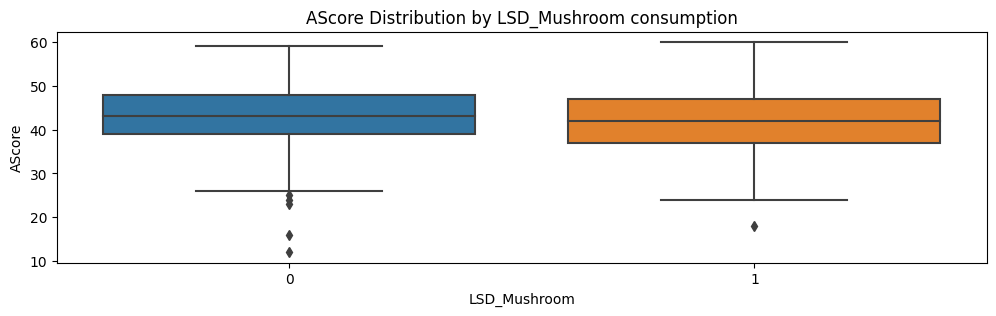

In [369]:
plt.figure(figsize=(12, 3))

sns.boxplot(x='LSD_Mushroom', y='AScore', data=df_final)
plt.title('AScore Distribution by LSD_Mushroom consumption')
plt.show()

In [370]:
users = df_final[df_final['LSD_Mushroom'] == 1]['AScore']
non_users = df_final[df_final['LSD_Mushroom'] == 0]['AScore']

median_users = np.median(users)
median_non_users = np.median(non_users)

if median_users > median_non_users:
    print("Drug users have a higher median AScore.")
elif median_users < median_non_users:
    print("Non-drug users have a higher median AScore.")
else:
    print("The medians are equal for drug users and non-drug users.")


Non-drug users have a higher median AScore.


These analysis above suggests a significant difference in the distribution of AScore between consumers and non-consumers. There is evidence to indicate that drug users have a lower median AScore compared to non-drug users.

AScore represents Agreeableness, which associated with being cooperative, negotiative, and considerate towards others. Hallucinogenic substances like LSD and Mushroom can induce intense sensory and perceptual distortions, leading to disruptions in cognitive and emotional functions. During hallucinations, individuals may experience a temporary shift from social norms and behaviors, including agreeableness. This can result in a lower median AScore among drug users compared to non-drug users, indicating a potential association between the consumption of LSD and Mushroom and a decrease in agreeableness.

### 3e. CSCORE

In [371]:
# Mann Whitney Test
# H0 = There is a significant difference in the distribution of CScore between LSD and Mushroom consumers compared to non-consumers
# H1 = There is no significant difference in the distribution of CScore between LSD and Mushroom consumers compared to non-consumers

group1 = df_final[df_final['LSD_Mushroom'] == 1]['CScore']
group0 = df_final[df_final['LSD_Mushroom'] == 0]['CScore']
stats, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

if p_value< 0.05:
    print("CScore:")
    print(f"P-value: {p_value}")
    print("Reject H0.\n")
else:
    print("CScore:")
    print(f"P-value: {p_value}")
    print("Accept H0.\n")


CScore:
P-value: 4.1615434747302566e-06
Reject H0.



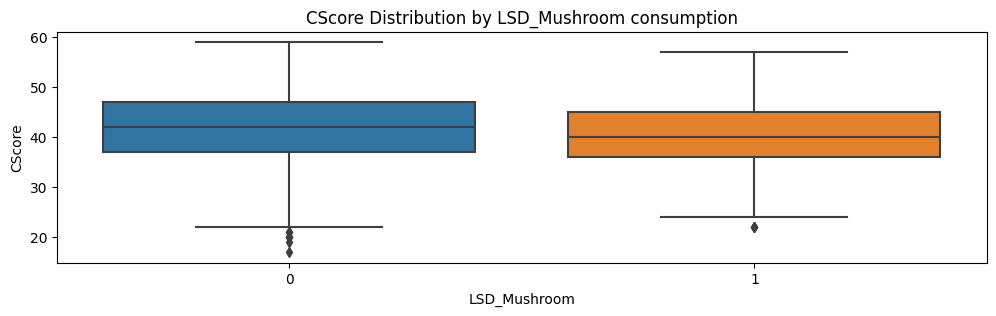

In [372]:
plt.figure(figsize=(12, 3))

sns.boxplot(x='LSD_Mushroom', y='CScore', data=df_final)
plt.title('CScore Distribution by LSD_Mushroom consumption')
plt.show()

In [373]:
users = df_final[df_final['LSD_Mushroom'] == 1]['CScore']
non_users = df_final[df_final['LSD_Mushroom'] == 0]['CScore']

median_users = np.median(users)
median_non_users = np.median(non_users)

if median_users > median_non_users:
    print("Drug users have a higher median CScore.")
elif median_users < median_non_users:
    print("Non-drug users have a higher median CScore.")
else:
    print("The medians are equal for drug users and non-drug users.")


Non-drug users have a higher median CScore.


In regards to the analysis above, it is concluded that there is enough eevidence to suggest that drug users have a lower median CScore compared to non-drug users. 

CScore represents conscientiousness, willing to achieve, and goal-oriented, it needs self-disciplined, responsible, and high-level of focus to have a high CScore. Hallucinogens, such as LSD and Mushroom, can induce alterations in perception, cognition, and consciousness, temporarily disrupting cognitive and behavioral patterns. This disruption may lead to a reduction in traits associated with conscientiousness, such as self-discipline, responsibility, and goal-oriented behavior. 

# **Conclusion and Recommendation**

Based on our previous analysis, the following conclusions can be drawn:
- The demographic characteristics for LSD_Mushroom consumers are = 
    - The age group of 18-24 years old (young adults) shows the highest prevalence of LSD and Mushroom consumption
        - Factors such as transition zone from adolescence to adulthood. Tendencies to experiment/explore new things and engage in risk-taking behaviors.
    - Males exhibit a higher prevalence of consumption than females
    - Participants with a college/university degree but no certificate or degree are most commonly associated with LSD and Mushroom consumption
        - High level of stressors, peer influences, and lifestyle, and due to the exposure to social environments that facilitates substance use.
    - America has the highest number of LSD and Mushroom consumers, despite the total number of participants in Europe is higher than in America. 
    - White ethnicity demonstrates the highest prevalence of LSD and Mushroom consumption
        - Due to the small sample sizes for the other ethnicities, be careful in interpreting this findings.
- Due to its hallucinogenic effects, LSD and Mushroom consumptions may leads to = 
    - Higher median **EScore** than non-consumers, which indicates a higher level of extraversion
    - Higher median **OScore** than non-consumers, that indicates a higher level of openness
    -  Lower median **AScore** than non-consumers, which indicates a lower level of agreeableness
    - Lower median **CScore** than non-consumers, that indicates a lower level of conscientiousness

It is important to note that these conclusions are based on the provided data, which still has some limitations. Additional research are required to explore further.


### Recommendation

- Targeted prevention programs specifically for young adults and males to educate about the risks of co-occuring drug consumption.
    - To enhance the effectiveness of the existing foundations and services in this field, such as Substance Abuse and Mental Health Services Administration (SAMHSA), Hanley Foundation, etc, there are still numerous amount of young adults that are experienceing drug abuse. It is recommended to actively engage parents or caregivers in the prevention efforts, and providing parental guidance and supervision
        - Collaborative efforts between foundations, services and parets/caregivers can create a more comprehensive support system that promotes positive youth development, by providing them with resources and educational materials to better understand the risks and signs of drug abuse. Encourage open communication and provide guidance on how to support and supervise young adults effectively.
        - Collaborate with existing foundations and services in the field to enhance their outreach efforts and expand their programs to reach a wider audience.
- Make an accessible and affordable psychological support services available to high-risked individuals
    - Professional psychologist in Western countries can be expensive for some individuals. Therefore, it is recommended to develop and implement initiatives (from the government, or NGO, or community-based support groups) to provide affordable options.
        - Individuals at high risk of drug abuse can receive the necessary guidance with affordable psychological support 
- In further research, make sure that there are an equal and balanced representation of each categories, to ensure the validity of the findings. 

In [374]:
df_final.to_csv('Cleaned_Capstone_Project.csv')

In [375]:
df_clean.to_csv('Capstone_Project.csv')

In [376]:
df_final.to_csv('Cleaned_Capstone.csv')

In [377]:
df_clean.to_csv('Capstone.csv')


In [378]:
df_clean

,Age,Gender,Education,Continent,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,Europe,Mixed,39,36,42,37,42,...,0,0,0,0,0,0,0,0,2,0
2,25-34,Male,Doctorate Degree,Europe,White,29,52,55,48,41,...,0,4,0,2,0,2,3,0,4,0
3,35-44,Male,Professional certificate/diploma,Europe,White,31,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
4,18-24,Female,Masters Degree,Europe,White,34,34,46,47,46,...,0,0,0,2,0,0,0,0,2,0
5,35-44,Female,Doctorate Degree,Europe,White,43,28,43,41,50,...,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or degree",America,White,25,51,57,48,33,...,0,0,0,0,3,3,0,0,0,5
1885,18-24,Male,"Some college or university, no certificate or degree",America,White,33,51,50,48,30,...,0,2,0,0,3,5,4,4,5,0
1886,25-34,Female,University Degree,America,White,47,30,37,31,31,...,0,4,0,2,0,2,0,2,6,0
